#Importing Libraries and Discovering Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio



from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample, shuffle
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
water = pd.read_csv('water_potability.csv')
water.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
water.shape

(3276, 10)

In [5]:
water.duplicated().sum()

0

In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<Axes: >

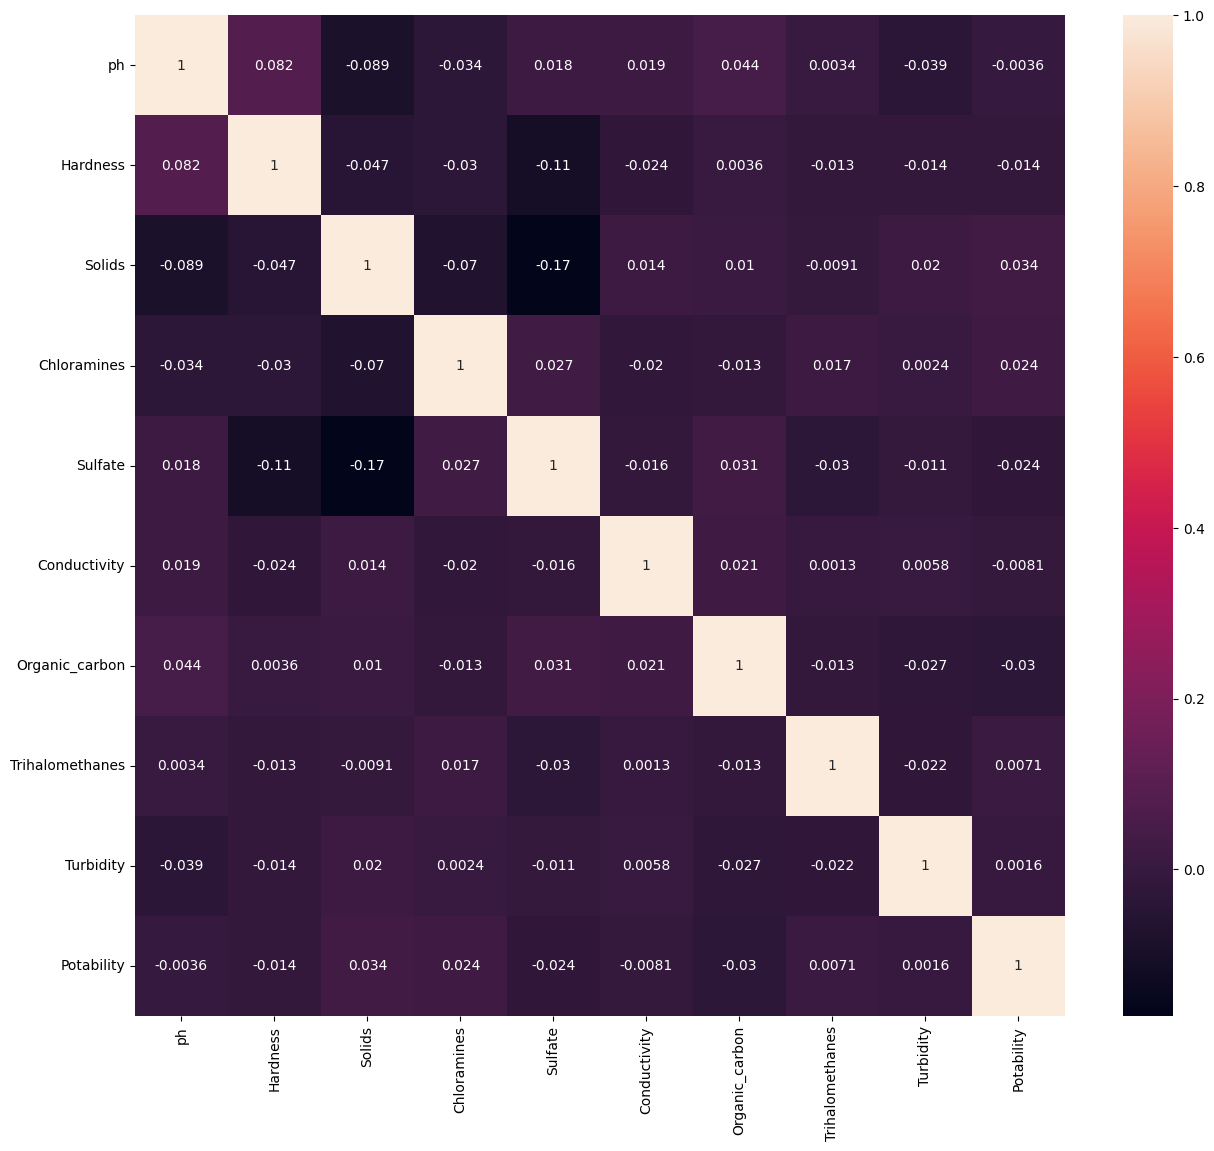

In [8]:
#mmkn ttshal w asebha fl visualization
correlation = water.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation, annot=True)

#Checking Missing Values

In [9]:
#A function to calculate null %
def get_null_percentages(df):
  null_counts = df.isnull().sum()
  total_counts = len(df)
  #avoid division by zero for empty DataFrames
  if total_counts == 0:
    return pd.Series(0, index=df.columns)
  return (null_counts / total_counts) * 100

In [10]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
null_percentages_water = get_null_percentages(water.copy())
print("Percentage of null values in each column for water: (%)")
print(null_percentages_water.to_string())

Percentage of null values in each column for water: (%)
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000


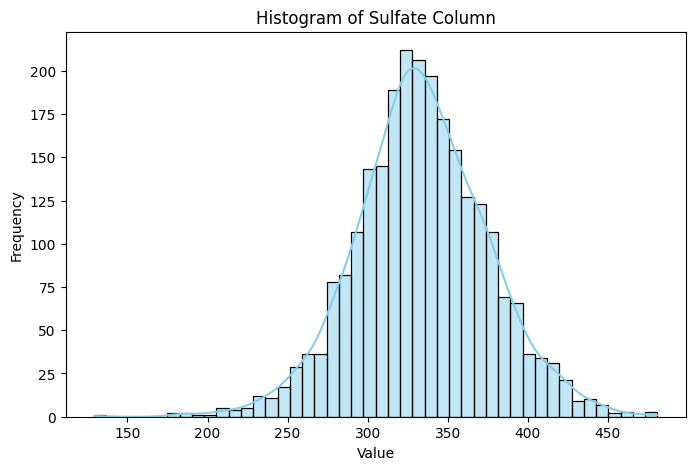

In [12]:
data_sulfate = water['Sulfate']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_sulfate, kde=True, color='skyblue')
plt.title('Histogram of Sulfate Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

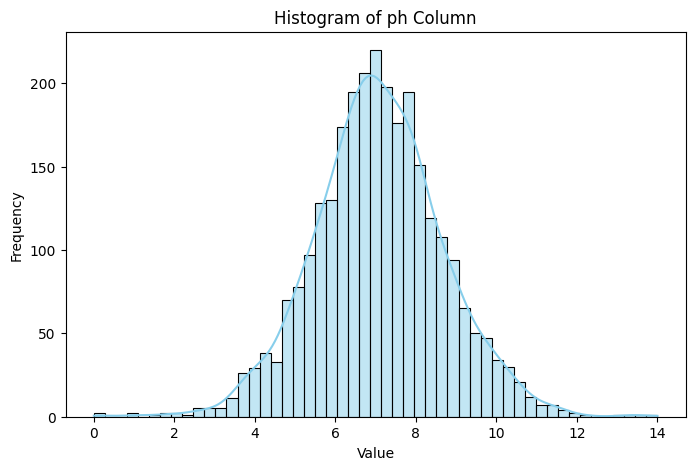

In [13]:
data_ph = water['ph']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_ph, kde=True, color='skyblue')
plt.title('Histogram of ph Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

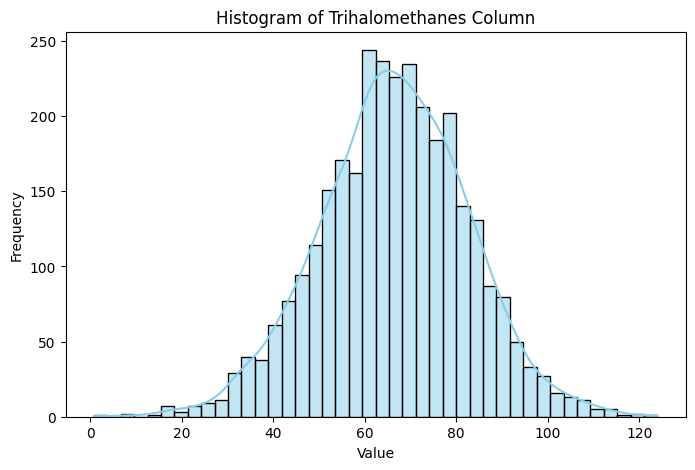

In [14]:
data_Trihalomethanes = water['Trihalomethanes']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_Trihalomethanes, kde=True, color='skyblue')
plt.title('Histogram of Trihalomethanes Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

-> conclusion: data for 3 columns having NULLS (ph, sulfate, trihalomethanes) is normally distributed, therefore, replacing nulls with median "as it is less sensitive to outliers than the mean",  and not deleting their whole rows.

In [15]:
median_ph = water['ph'].median()
water['ph'].fillna(median_ph, inplace=True)

median_sulfate = water['Sulfate'].median()
water['Sulfate'].fillna(median_sulfate, inplace=True)

median_Trihalomethanes = water['Trihalomethanes'].median()
water['Trihalomethanes'].fillna(median_Trihalomethanes, inplace=True)

#validation:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Upscaling: Bootstrapping - Potability Column

In [16]:
#Pie Chart
potability_counts = water['Potability'].value_counts()


fig0 = px.pie(names=potability_counts.index, values=potability_counts.values,title='Distribution of Potability Classes', labels={'names': 'Potability'})
fig0.show()

-> This is an issue, due to the biased data points toward the zeroes counts in the target feature [Potability], this will result in a biased training dataset handled to models leading to poor model accuracy

##Proof of the poor accuracy and the need of upscaling

In [17]:
X = water.drop(columns=['Potability'], axis=1)
y = water['Potability']
sc=StandardScaler()
features=X.columns
X_scaled=sc.fit_transform(X)
upsampled_scaled=pd.DataFrame(X_scaled, columns=features)
X_train, X_test, y_train,y_test= train_test_split(upsampled_scaled, y, test_size=0.2, random_state=42)

#models:
Log_reg=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=0)
SVM=SVC(C=10, gamma=1)
decision_tree=DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)

classifiers=[('Logistic Regression', Log_reg),('Support Vector Machine', SVM),('Decision Tree', decision_tree)]
for classifier_name, classifier in classifiers:
  classifier.fit(X_train, y_train)

  y_pred= classifier.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)

  print('{:s} : {:.2f}'.format(classifier_name, accuracy*100))

Logistic Regression : 50.91
Support Vector Machine : 60.21
Decision Tree : 57.62


##Upscaling

In [18]:
minority_class = water[water['Potability'] == 1]
majority_class = water[water['Potability'] == 0]

# Upsample the minority class using bootstrapping
upsampled_minority = resample(minority_class, replace=True, n_samples=1998)

# Combine the upsampled minority class with the original majority class
upsampled_data = pd.concat([majority_class, upsampled_minority])
upsampled_data=shuffle(upsampled_data)
# Check the class distribution after upsampling
print(upsampled_data['Potability'].value_counts())

Potability
0    1998
1    1998
Name: count, dtype: int64


#Outliers

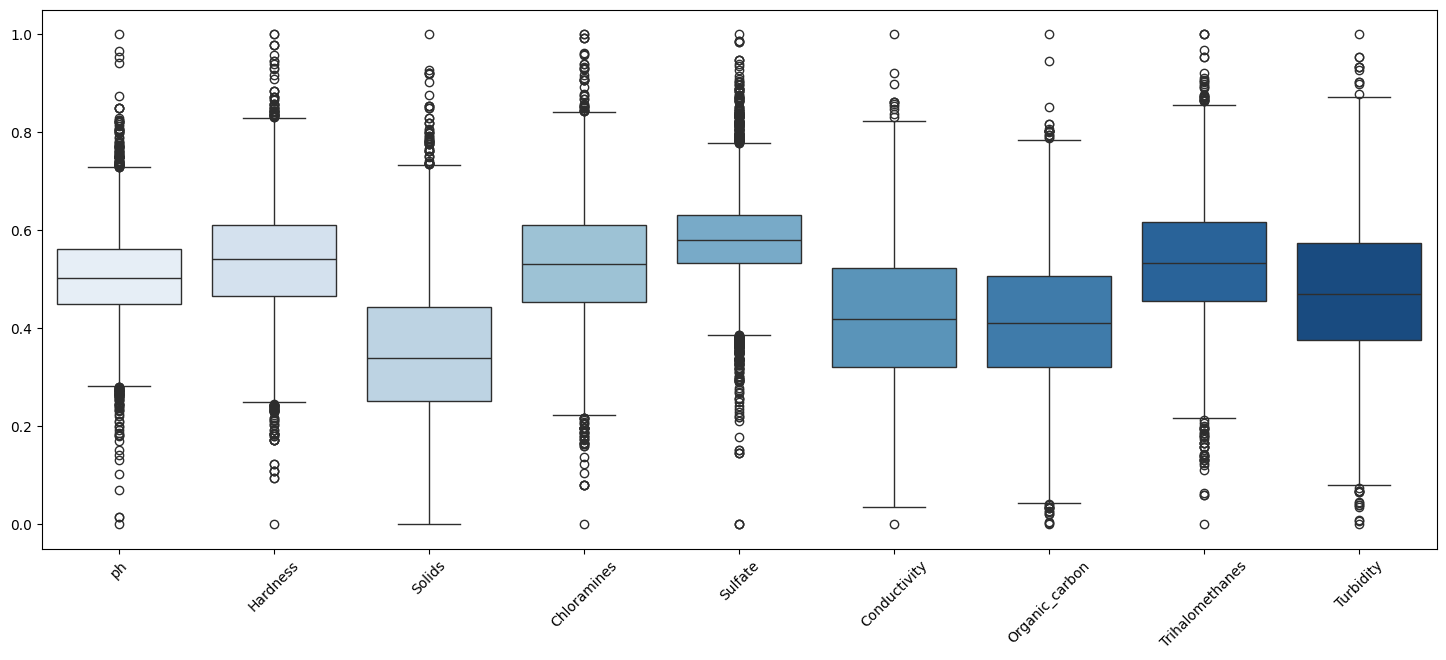

In [19]:
columns_to_scale = ['ph', 'Hardness', 'Solids',  'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaler = MinMaxScaler()
scaled_water = scaler.fit_transform(upsampled_data[columns_to_scale])

# Creating a DataFrame with scaled data
scaled_water_df = pd.DataFrame(scaled_water, columns=columns_to_scale)

plt.figure(figsize=(18,7))
sns.boxplot(data=scaled_water_df, palette='Blues')  # Set palette to 'Blues'
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

In [20]:
import plotly.graph_objects as go

# Assuming 'scaled_water_df' is your DataFrame with scaled data

# Create a list to store the hover text
hover_text = []

# Iterate over each column in the DataFrame
for column in scaled_water_df.columns:
    # Add the original (unscaled) values as hover text for each column
    hover_text.append(scaled_water_df[column].astype(str) + '<br>' + column)

# Create a Box trace for each column
data = []
for i, column in enumerate(scaled_water_df.columns):
    # Add a Box trace for each column
    box = go.Box(y=scaled_water_df[column], name=column, hoverinfo='text', text=hover_text[i], marker_color='skyblue')
    data.append(box)

# Create the layout
layout = go.Layout(
    title='Box Plot of Scaled Water Quality Parameters',
    xaxis=dict(title='Parameter'),
    yaxis=dict(title='Scaled Value'),
    showlegend=False
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

In [21]:
columns_to_scale = ['ph', 'Hardness', 'Solids',  'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaler = MinMaxScaler()
scaled_water = scaler.fit_transform(upsampled_data[columns_to_scale])

#creating a DataFrame with scaled data
scaled_water_df = pd.DataFrame(scaled_water, columns=columns_to_scale)

fig = px.box(scaled_water_df, y=columns_to_scale, color_discrete_sequence=['royalblue'])

fig.update_layout(
    title="Boxplots of Scaled Water Quality Parameters",
    xaxis_title="Water Quality Parameters",
    yaxis_title="Scaled Value",
    xaxis_tickangle=45
)
fig.show()

##Calculating number of outliers for each column

In [22]:
columns_replace =upsampled_data.columns
for col in columns_replace:
    #calculating interquartile ranges: Q1,Q3
    q25, q75 = np.percentile(water[col], 25), np.percentile(water[col], 75)
    iqr = q75 - q25
    #calculating the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = ( ( water[col] < lower) | (water[col] > upper) )
    index_label = water[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in ph: 142
Number of outliers in Hardness: 83
Number of outliers in Solids: 47
Number of outliers in Chloramines: 61
Number of outliers in Sulfate: 264
Number of outliers in Conductivity: 11
Number of outliers in Organic_carbon: 25
Number of outliers in Trihalomethanes: 54
Number of outliers in Turbidity: 19
Number of outliers in Potability: 0


In [23]:
upsampled_data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3996.000000  3996.000000   3996.000000  3996.000000  3996.000000   
mean      7.090471   195.860714  22111.503676     7.144850   333.929499   
std       1.437429    33.308800   8875.812938     1.600401    37.080563   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.294630   176.025221  15616.384067     6.158694   316.958851   
50%       7.036752   196.654385  20982.439795     7.138343   333.073546   
75%       7.859024   216.122276  27410.099277     8.146643   351.318826   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3996.000000     3996.000000      3996.000000  3996.000000  3996.000000  
mean     426.116612       14.241238        66.495030     3.959255     0.500000  
std       81.855164        3.345438        15.846434     0.780773     0.500063  
min      181.483754        4.371899         0.738000     1.450000     0.000000  
25%      364.803426       12.049131        56.956939     3.439022     0.000000  
50%      421.485334       14.210624        66.622485     3.940443     0.500000  
75%      481.089353       16.496714        76.782036     4.490177     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [24]:
min_value = upsampled_data['ph'].min()
max_value = upsampled_data['ph'].max()

print("Minimum value of ph:", min_value)
print("Maximum value of ph:", max_value)

Minimum value of ph: 0.0
Maximum value of ph: 14.0


->Normal and true values for pH [0-14], so nothing is considered as an outlier

In [25]:
print("Minimum value of hardness:", upsampled_data['Hardness'].min())
print("Maximum value of hardness:", upsampled_data['Hardness'].max())

Minimum value of hardness: 47.432
Maximum value of hardness: 323.124


>For water hardness, it is often in the range of 50-500 mg/L

In [26]:
print("Minimum value of solids:", upsampled_data['Solids'].min())
print("Maximum value of solids:", upsampled_data['Solids'].max())

Minimum value of solids: 320.9426113
Maximum value of solids: 61227.19601


>For solids, total dissolved solids (TDS) represent the amount of inorganic and organic substances dissolved in water. TDS values can range from a few tens of milligrams per liter (mg/L) to several thousand mg/L, depending on factors such as the mineral content and pollution levels.

In [27]:
print("Minimum value of chloramines:", upsampled_data['Chloramines'].min())
print("Maximum value of chloramines:", upsampled_data['Chloramines'].max())

Minimum value of chloramines: 0.352
Maximum value of chloramines: 13.127


>Chloramines are disinfection byproducts formed when chlorine is used to disinfect water containing ammonia or organic nitrogen compounds.

>The level of chloramines in water can vary depending on several factors, including water treatment processes, source water quality, and environmental conditions.

>Concentrations of chloramines in drinking water are typically in the range of 1-5 mg/L

In [28]:
Q1_chloramines = upsampled_data['Chloramines'].quantile(0.25)
Q3_chloramines = upsampled_data['Chloramines'].quantile(0.75)
IQR_chloramines = Q3_chloramines - Q1_chloramines

#Define the IQR range
IQR_min_chloramines = Q1_chloramines - 1.5 * IQR_chloramines
IQR_max_chloramines = Q3_chloramines + 1.5 * IQR_chloramines
Chloramines_outliers = upsampled_data[(upsampled_data['Chloramines'] < IQR_min_chloramines) | (upsampled_data['Chloramines'] > IQR_max_chloramines)]

# Show the outliers of 'Chloramines' column and their corresponding 'Potability' values
print(Chloramines_outliers[['Chloramines', 'Potability']])

      Chloramines  Potability
2470     2.102691           0
304     12.363285           1
2326     3.117441           1
806      2.862535           1
509      1.683993           0
...           ...         ...
2350     1.390871           1
2796     3.016033           1
549     11.208688           0
651      2.750837           0
454      2.993744           0

[80 rows x 2 columns]


->Extreme values of chloramines doesn't have a direct effect on potability: therefore, a correlation coeff. indicating a non-linear relationship.

In [29]:
print("Minimum value of sulfate:", upsampled_data['Sulfate'].min())
print("Maximum value of sulfate:", upsampled_data['Sulfate'].max())

Minimum value of sulfate: 129.0
Maximum value of sulfate: 481.0306423


>Sulfate concentrations in water can vary depending on the geological characteristics of the area.

In [30]:
print("Minimum value of conductivity:", upsampled_data['Conductivity'].min())
print("Maximum value of conductivity:", upsampled_data['Conductivity'].max())

Minimum value of conductivity: 181.483754
Maximum value of conductivity: 753.3426196


> Electrical conductivity is a measure of the ability of water to conduct an electrical current and is related to the concentration of dissolved ions.

>Conductivity values in natural waters can range from less than 50 μS/cm (microsiemens per centimeter) in pure water to several thousand μS/cm in highly mineralized waters.

In [31]:
print("Minimum value of organic carbon:", upsampled_data['Organic_carbon'].min())
print("Maximum value of organic carbon:", upsampled_data['Organic_carbon'].max())

Minimum value of organic carbon: 4.371898608
Maximum value of organic carbon: 28.3


>The concentration of organic carbon in water can vary widely depending on factors such as the presence of organic matter, pollution levels, and treatment processes.

>Typical levels of organic carbon in natural waters are in the range of 1-10 mg/L

In [32]:
Q1_organic_carbon = upsampled_data['Organic_carbon'].quantile(0.25)
Q3_organic_carbon = upsampled_data['Organic_carbon'].quantile(0.75)
IQR_organic_carbon = Q3_organic_carbon - Q1_organic_carbon

#Define the IQR range
IQR_min_organic_carbon = Q1_organic_carbon - 1.5 * IQR_organic_carbon
IQR_max_organic_carbon = Q3_organic_carbon + 1.5 * IQR_organic_carbon
organic_carbon_outliers = upsampled_data[(upsampled_data['Organic_carbon'] < IQR_min_organic_carbon) | (upsampled_data['Organic_carbon'] > IQR_max_organic_carbon)]

# Show the outliers of 'organic_carbon' column and their corresponding 'Potability' values
print(organic_carbon_outliers[['Organic_carbon', 'Potability']])

      Organic_carbon  Potability
1827       23.317699           0
1055       23.952450           0
2057       24.755392           0
1663        4.473092           0
1536        5.218233           1
2224        4.466772           0
227        23.399516           0
3169       23.604298           1
3169       23.604298           1
1677       23.234326           0
420        23.373265           0
2082        5.188466           0
2414        5.196717           1
3169       23.604298           1
2680        5.159380           0
1390        4.371899           0
2601       23.667667           0
2236       27.006707           0
1792       28.300000           0
558        23.514774           0
1689        5.051695           0
2138        4.902888           0
1536        5.218233           1
333         5.315287           1
1447        4.861631           0
1287        5.362371           0
43         23.917601           0
3169       23.604298           1
876         4.966862           0
3169      

->High organic carbon levels doesn't necessarily indicate 0 water potability nor 1

In [33]:
print("Minimum value of trihalomethanes:", upsampled_data['Trihalomethanes'].min())
print("Maximum value of trihalomethanes:", upsampled_data['Trihalomethanes'].max())

Minimum value of trihalomethanes: 0.738
Maximum value of trihalomethanes: 124.0


> Trihalomethanes are disinfection byproducts formed when **chlorine** reacts with **organic matter** in water.

>THM concentrations in drinking water are typically regulated and are often below 100 μg/L (micrograms per liter).

In [34]:
print("Minimum value of turbidity:", upsampled_data['Turbidity'].min())
print("Maximum value of turbidity:", upsampled_data['Turbidity'].max())

Minimum value of turbidity: 1.45
Maximum value of turbidity: 6.739


>Turbidity values in natural waters can vary widely depending on factors such as sedimentation, erosion, and anthropogenic activities.

##Replacing outliers with upper and lower bounds

In [35]:
specified_columns = ['Chloramines', 'Sulfate']
columns_replace = water[specified_columns]

for col in columns_replace:
  #calculating interquartile ranges: Q1,Q3:
    q25, q75 = np.percentile(water[col], 25), np.percentile(water[col], 75)
    iqr = q75 - q25
    #calculate the outlier cutoff:
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    water[col] = np.where(water[col] < (q25 - cut_off), q25 - cut_off, water[col])
    water[col] = np.where(water[col] > (q75 + cut_off), q75 + cut_off, water[col])

#Feature Engineering

In [36]:
#Total Dissolved Solids:
upsampled_data['TDS'] = upsampled_data['Solids'] + upsampled_data['Chloramines'] + upsampled_data['Sulfate'] + upsampled_data['Trihalomethanes']
upsampled_data['Chloramines_to_Solids_Ratio'] = upsampled_data['Chloramines'] / upsampled_data['Solids']
upsampled_data['Chloramines_per_Conductivity'] = upsampled_data['Chloramines'] / upsampled_data['Conductivity']

upsampled_data.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
215   7.036752  105.859264  37928.14218     5.609440  333.073546   
1125  9.008464  148.614002  35021.77410     5.594007  333.073546   
748   6.750761  207.254505  23642.99260     7.691012  293.783040   
2698  4.858056  159.695554  32886.52890     7.689305  333.073546   
2238  7.036752  197.713639  31251.64373     6.252423  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
215     358.888768       12.207108        71.119890   3.873853           0   
1125    387.399771       11.855103        49.480441   3.911015           1   
748     446.696939        6.000391        30.900815   2.777726           1   
2698    337.388035       23.108016        76.094469   4.130972           0   
2238    322.217629       14.271722        74.644268   3.906526           0   

               TDS  Chloramines_to_Solids_Ratio  Chloramines_per_Conductivity  
215   38337.945056                     0.000148                      0.015630  
1125  35409.922093                     0.000160                      0.014440  
748   23975.367467                     0.000325                      0.017218  
2698  33303.386220                     0.000234                      0.022791  
2238  31665.613967                     0.000200                      0.019404

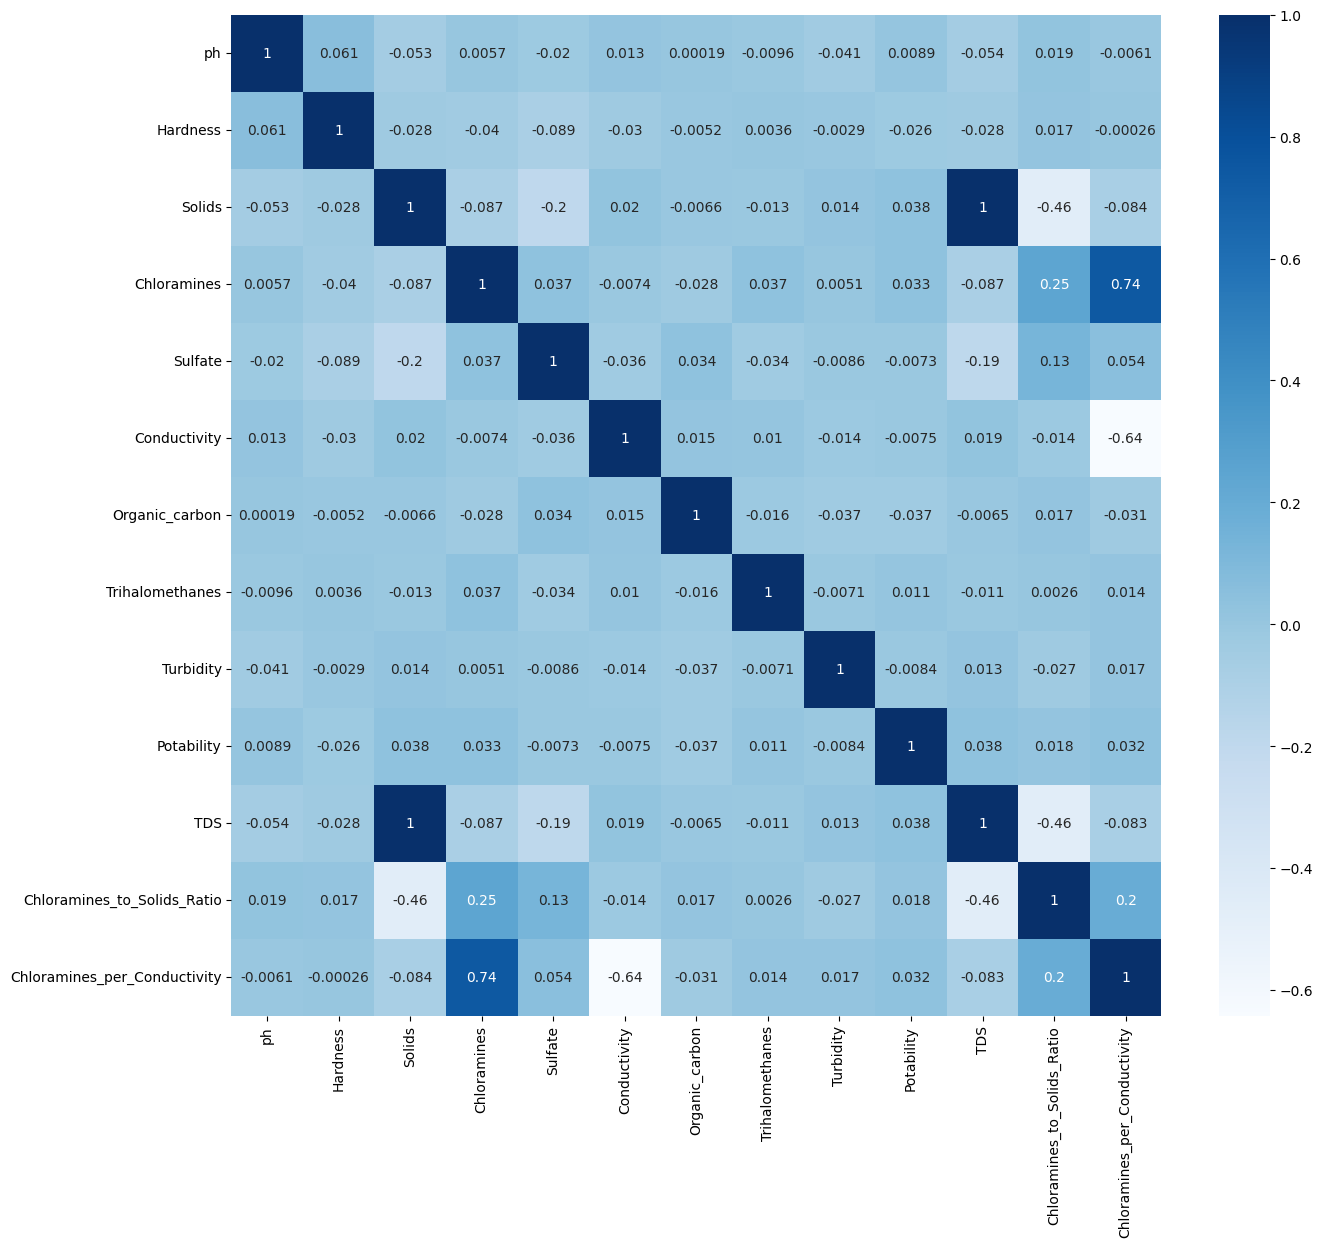

In [37]:
correlation = upsampled_data.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show()

#Feature Scaling

In [38]:
X = upsampled_data.drop(columns=['Potability'], axis=1)
y = upsampled_data['Potability']
sc=StandardScaler()
features=X.columns
X_scaled=sc.fit_transform(X)
upsampled_scaled=pd.DataFrame(X_scaled, columns=features)

In [39]:
upsampled_data.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
215   7.036752  105.859264  37928.14218     5.609440  333.073546   
1125  9.008464  148.614002  35021.77410     5.594007  333.073546   
748   6.750761  207.254505  23642.99260     7.691012  293.783040   
2698  4.858056  159.695554  32886.52890     7.689305  333.073546   
2238  7.036752  197.713639  31251.64373     6.252423  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
215     358.888768       12.207108        71.119890   3.873853           0   
1125    387.399771       11.855103        49.480441   3.911015           1   
748     446.696939        6.000391        30.900815   2.777726           1   
2698    337.388035       23.108016        76.094469   4.130972           0   
2238    322.217629       14.271722        74.644268   3.906526           0   

               TDS  Chloramines_to_Solids_Ratio  Chloramines_per_Conductivity  
215   38337.945056                     0.000148                      0.015630  
1125  35409.922093                     0.000160                      0.014440  
748   23975.367467                     0.000325                      0.017218  
2698  33303.386220                     0.000234                      0.022791  
2238  31665.613967                     0.000200                      0.019404

In [40]:
upsampled_scaled.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.037376 -2.702370  1.782216    -0.959511 -0.023086     -0.821405   
1  1.334490 -1.418623  1.454727    -0.969156 -0.023086     -0.473051   
2 -0.236361  0.342108  0.172568     0.341309 -1.082818      0.251455   
3 -1.553256 -1.085890  1.214128     0.340242 -0.023086     -1.084106   
4 -0.037376  0.055636  1.029909    -0.557697 -0.023086     -1.269462   

   Organic_carbon  Trihalomethanes  Turbidity       TDS  \
0       -0.608107         0.291891  -0.109395  1.783976   
1       -0.713340        -1.073852  -0.061793  1.453768   
2       -2.463617        -2.246478  -1.513470  0.164234   
3        2.650740         0.605855   0.219960  1.216203   
4        0.009113         0.514328  -0.067542  1.031503   

   Chloramines_to_Solids_Ratio  Chloramines_per_Conductivity  
0                    -0.558508                     -0.339396  
1                    -0.533177                     -0.565519  
2                    -0.178748                     -0.037779  
3                    -0.374587                      1.021102  
4                    -0.446827                      0.377711

#Modeling

##Splitting train and test data

In [41]:
X_train, X_test, y_train,y_test= train_test_split(upsampled_scaled, y, test_size=0.2, random_state=42)

##Logistic Regression, SVM, Decision Tree

NOTES:
1. logistic regression:
- Normalizer: parameter C represents the inverse of regularization strength. It controls the regularization term's impact on the optimization objective. A smaller value of C indicates stronger regularization, which penalizes large coefficients in the model, thus preventing overfitting. Conversely, a larger value of C reduces the strength of regularization, allowing the model to fit the training data more closely. In this case, C=0.1 suggests moderate regularization.

- Penalty: determines the regularization penalty applied to the model. In logistic regression, two common penalties are used: L1 regularization ('l1') and L2 regularization ('l2'). L1 regularization adds the absolute value of the coefficients to the loss function, promoting sparsity by encouraging some coefficients to be exactly zero. L2 regularization adds the squared magnitude of the coefficients to the loss function, penalizing large coefficients.

- Solver: specifies the optimization algorithm used to fit the logistic regression model to the training data. Different solvers are available for logistic regression, each suitable for different types of datasets and regularization penalties. The 'liblinear' solver is suitable for small to medium-sized datasets and supports both L1 and L2 penalties. It is efficient for binary classification tasks.

2. SVM:
- Normalizer: parameter C is the regularization parameter of the SVM model. It controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C allows for a larger margin but may lead to more misclassifications on the training data. Conversely, a larger value of C penalizes misclassifications more heavily, resulting in a smaller margin but potentially better classification accuracy. C=10 suggests a relatively high penalty for misclassifications.

- Gamma: is the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of a single training example, with low values meaning 'far' and high values meaning 'close'. A low value of gamma indicates a larger radius of influence for each data point, resulting in smoother decision boundaries. Conversely, a high value of gamma means each data point has a smaller radius of influence, leading to more complex decision boundaries that may be more prone to overfitting. gamma=1 suggests a relatively high influence of each training example.

3. Decision Tree:
- Max depth:  specifies the maximum depth of the decision tree. A decision tree continues to split nodes until either all leaves are pure or the maximum depth is reached. Setting max_depth=None means there is no maximum depth limit, and the tree will grow until all leaves are pure or until all leaves contain fewer samples than min_samples_split.

- Min sample split: sets the minimum number of samples required to split an internal node. If the number of samples at a node is less than min_samples_split, the node will not be split, and it will become a leaf node. This parameter helps control the complexity of the decision tree and prevents overfitting by requiring a minimum number of samples for further splitting.

In [42]:
Log_reg=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=0)
SVM=SVC(C=10, gamma=1)
decision_tree=DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)


In [43]:
classifiers=[('Logistic Regression', Log_reg),('Support Vector Machine', SVM),('Decision Tree', decision_tree)]
for classifier_name, classifier in classifiers:
  classifier.fit(X_train, y_train)

  y_pred= classifier.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)

  print('\n{:s} : {:.2f}'.format(classifier_name, accuracy*100))
  confusion_mat = confusion_matrix(y_test, y_pred)
  print('{:s} Confusion Matrix:'.format(classifier_name))
  print(confusion_mat)


Logistic Regression : 50.00
Logistic Regression Confusion Matrix:
[[210 204]
 [196 190]]

Support Vector Machine : 82.38
Support Vector Machine Confusion Matrix:
[[367  47]
 [ 94 292]]

Decision Tree : 75.62
Decision Tree Confusion Matrix:
[[288 126]
 [ 69 317]]


##Random Forest

In [44]:
RF_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy on Training Data:", grid_search.best_score_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

RF_predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy * 100,'%')


Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy on Training Data: 0.6877337636932708
Test Accuracy: 67.0 %


['rf.pkl']

##Naive Bayes

In [45]:
clf = GaussianNB()

#training the classifier
clf.fit(X_train, y_train)

#predicting on the test data
NB_y_pred = clf.predict(X_test)

#evaluating the model
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print("Accuracy %:", NB_accuracy*100)




Accuracy %: 53.75


##Gradiant Boosting

In [46]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
clf.fit(X_train, y_train)
GB_y_pred = clf.predict(X_test)

#model evaluation
GradiantB_accuracy = accuracy_score(y_test, GB_y_pred)
print("Accuracy %:", GradiantB_accuracy*100)

Accuracy %: 67.125


##KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)
KNN_predictions = knn.predict(X_test)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test) * 100)




64.625


##Confusion matrices

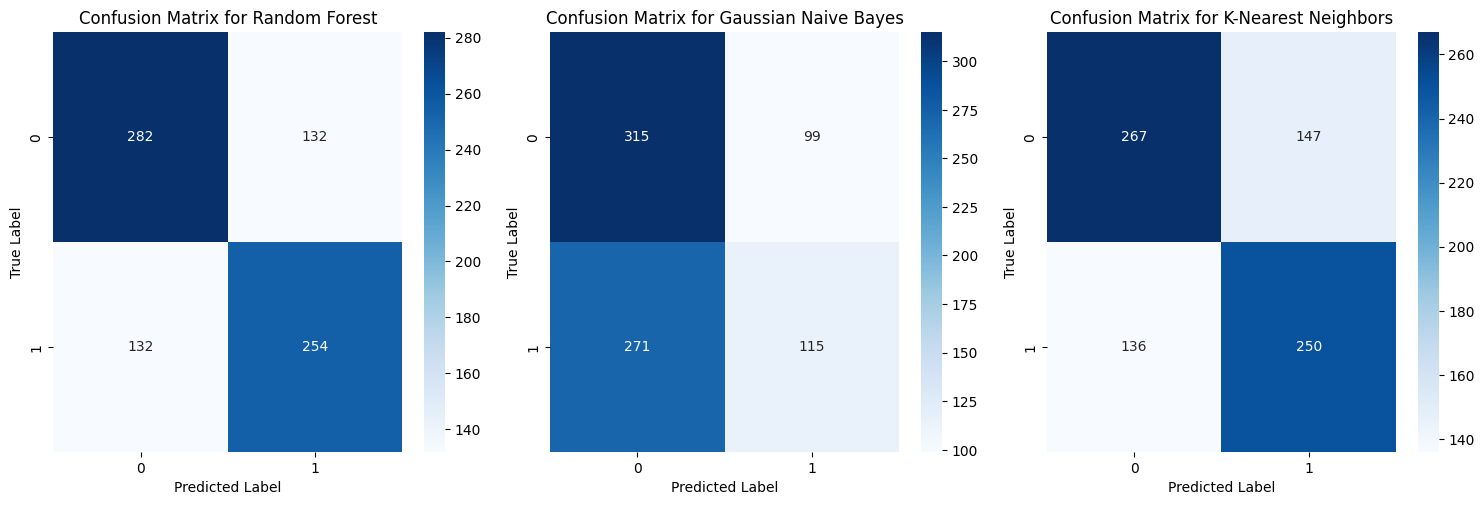

In [48]:
plt.figure(figsize=(20, 9.5))


# Plot for Random Forest
RF_confusion_matrix = confusion_matrix(y_test, RF_predictions)
plt.subplot(2, 4, 1)
sns.heatmap(RF_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot for Gaussian Naive Bayes
NB_confusion_matrix = confusion_matrix(y_test, NB_y_pred)
plt.subplot(2, 4, 2)
sns.heatmap(NB_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot for K-Nearest Neighbors
knn_confusion_matrix = confusion_matrix(y_test, KNN_predictions)
plt.subplot(2, 4, 3)
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

## Exporting Models

In [49]:
log_reg_file='log_reg'
joblib.dump(Log_reg,log_reg_file)

svm_file='svm'
joblib.dump(SVM,svm_file)

decision_tree_file='decision_tree'
joblib.dump(decision_tree,decision_tree_file)

clf_file='clf'
joblib.dump(clf,clf_file)

knn_file='knn'
joblib.dump(knn,knn_file)

rf_file='rf'
joblib.dump(best_model,rf_file)

['knn']


Logistic Regression : 50.00

Support Vector Machine : 82.38

Decision Tree : 75.62


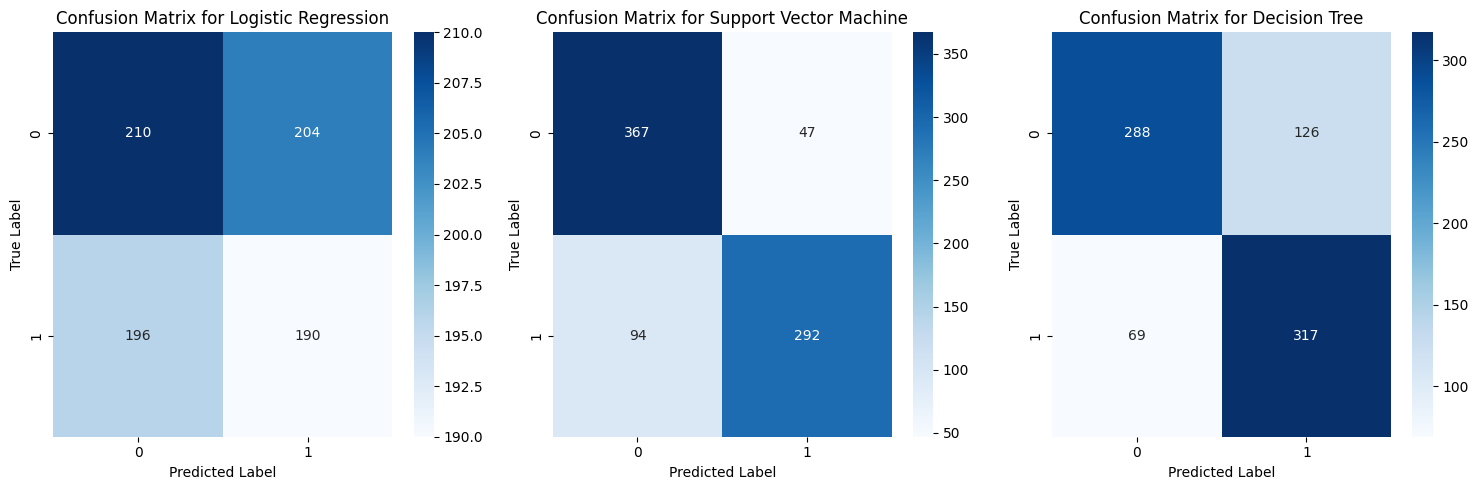

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

classifiers = [('Logistic Regression', Log_reg), ('Support Vector Machine', SVM), ('Decision Tree', decision_tree)]

plt.figure(figsize=(15, 5))

for i, (classifier_name, classifier) in enumerate(classifiers, start=1):
    # Fit the classifier
    classifier.fit(X_train, y_train)

    # Predict labels
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print('\n{:s} : {:.2f}'.format(classifier_name, accuracy*100))
    
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.subplot(1, 3, i)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix for " + classifier_name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()
